# Calculations with units
In the beginning I showed how you can use python like a calculator.  Here we will import a library which allows us to do calculations with units. This isn't always helpful. If you just want to knock out a calculation without a lot of fuss and bother then just do it. If you need to check if your calculation will work with a variety of non-standard units then this may be the right thing.

## Specific Libraries for physics modelling
As your comfort grows there are some specific tools that can help you do calculations and model
 - [Pint](https://pint.readthedocs.io) a library for doing calculations with units.

In [11]:
#@title Basic Libraries
# First the usual imports:
import numpy as np
# matplotlib is the tool that will create the graphs
import matplotlib.pyplot as plt

In [2]:
!pip install pint
#import the unit/dimension handling library
import pint
# initialize our Units
SI = pint.UnitRegistry(system='mks')

     |████████████████████████████████| 215kB 4.9MB/s 


In [3]:
x = 2.34 * SI.meter  # set x to 2.34 meters
y = 34.3 * SI.centimeter
t = 3.24 * SI.second

In [4]:
area = x*y
area.to(SI.inch * SI.inch)

1244.0634881269762 inch²

In [5]:
v = y/t
v.to(SI.cm/SI.second)

10.586419753086417 centimeter/second

In [9]:
# formatting 
print(f"{v.to_base_units()}")
print(f"{v.to_base_units():5.2f}")

0.10586419753086418 meter / second
0.11 meter / second


### Strings
You can also parse in units as strings.

In [ ]:
s = ureg('2.54 * centimeter')
s.to(SI.inch)

1.0 inch

In [ ]:
dens = ureg('23.6 gram')/s**3
print(f"the density of the slug is {dens:6.3f}")
# add a P and the result is 'Pretty Printed'
print(f"the density in pretty print abbreviated: {dens:5.3P}")

the density of the slug is 1.440 gram / centimeter ** 3
the density in pretty print abbreviated: 1.44 gram/centimeter³


In [ ]:
dens.dimensionality  # a universal way to check units

<UnitsContainer({'[length]': -3.0, '[mass]': 1.0})>

In [ ]:
# What are the dimensions of a common electrical unit, the Ohm
R = 123.3 * SI.ohm
print(f"{R}")
R.dimensionality

123.3 Ω


<UnitsContainer({'[current]': -2.0, '[length]': 2.0, '[mass]': 1.0, '[time]': -3.0})>

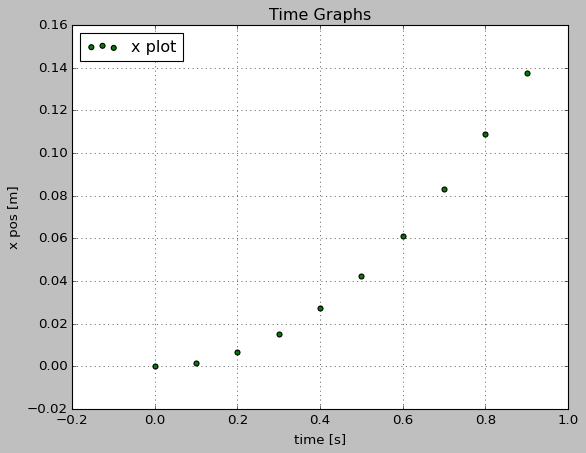

In [12]:
# Next we run the following lines of code:
t = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
x = np.array([0.0, 0.0017, 0.0068, 0.0153, 0.0272, 0.0425, 0.0612, 0.0833,0.1088, 0.1377])

# begin the plot process...
# 4 styles  (there are many more; look them up)
#plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-white')
#plt.style.use('ggplot')
plt.style.use('classic')

# plot the points  c is the color, you can make multiple plots
#  in a single frame and give them different labels and colors
plt.scatter(t, x, c="g", label="x plot")
# repeat the above line to include other datasets  

# label the axes and graph
plt.xlabel("time [s]")
plt.ylabel("x pos [m]")
plt.title("Time Graphs")

# put up a legend
plt.legend(loc="upper left")  # has to appear after we plot.
plt.grid(True)

# show it.
plt.show()

### Dimensions
Wow, we can see that an Ohm has dimensions of 
$$\frac{[M]\;[L]^2}{[A]^2\;[T]^3}$$
or if expressed in SI:
$$\frac{kg\;m^2}{A^2\;s^3}$$
This makes sense given Ohm's Law $V=i\cdot R$. The right side, $i\cdot R$, has units of $\frac{kg\;m^2}{A\cdot s\;s^2}$ or $\frac{J}{C}$ while the left side, V, is in volts or... $\frac{J}{C}$

## Uncertainties
This was a real pain early in the year.  Now we can do caculations with errors and see how they propogate through to an answer.

In [ ]:
# This library allows us to declare and do calculations on values
#   with uncertainties. Even better it works transparently with units.
import uncertainties

meas1 = ufloat(12.3,0.3) * SI.cm
meas2 = ufloat(0.23,0.005) * SI.sec
print( f"resulting velocity: {meas1/meas2}")

resulting velocity: 53.5+/-1.7 cm/s


In [ ]:
print( meas2**2 )

0.0529+/-0.0023 s²


In [ ]:
# get 10°±2° in radians (20% error)
dtheta = ufloat(10,2)
rtheta = radians(dtheta)
# notice the difference between the error for the sin and cos
print(f"sin(𝜃):{sin(rtheta)} cos(𝜃):{cos(rtheta)}")

sin(𝜃):0.174+/-0.034 cos(𝜃):0.985+/-0.006


How does that work?  $\frac{0.034}{0.174}$ is about **20%** which is what we started with but $\frac{0.006}{0.985}$ is about **&#xBD;%**.  Think about the graph of sin and cos. At small $\theta$ $sin(\theta)$ is varying almost linearly whereas $cos(\theta)$ is alost constant (not chaning at all).

Here is how error in rise over run translates to an uncertainty in the angle...

In [ ]:
rise = ufloat(2,0.1)  # 5%
run = ufloat(1,0.1) # 10%
print( degrees( atan2( rise, run ) ) )  # ~4%

63.4+/-2.6
